# 🏋️ BMI Predictor

In this assignment, we will build a machine learning model to simulate health experts by classifying a given individual based on their height and weight into either one of <br><br> $BMI ∈ {Extremly Weak, Weak, Normal, Overweight, Obese, Extremly Obese}$
<br>

We will be using the Bayes Classification library that you implemented yourself for this!

### Basic Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Data Preperation

Let's start by reading the data from the local database

#### Ingestion

In [3]:
# TODO 1: Load the dataset
dataset = pd.read_csv('bmi.csv')

# Print the first 10 rows of the dataset
dataset.head(10)

,Gender,Height,Weight,Index
0,Male,174,96,Obese
1,Male,189,87,Normal
2,Female,185,110,Obese
3,Female,195,104,Overweight
4,Male,149,61,Overweight
5,Male,189,104,Overweight
6,Male,147,92,Extremely Obese
7,Male,154,111,Extremely Obese
8,Male,174,90,Overweight
9,Female,169,103,Obese


Unlike unstructured data (images, videos, etc.), structured data doesn't necessarily require feature extraction but surely requires data cleaning

#### Cleaning

In [4]:
# TODO 2: Print the number of missing values and drop them if any
num_missing_vals = dataset.isnull().sum()
num_missing_vals 
dataset.dropna()

# TODO 3: Rationally decide whether to keep or remove the 'Gender' column.

# I will keep the Gender column because it can be useful in predicting the BMI 
# for exampe if 80% of the dataset are female as well as the index obese
# knowing that fact , will help the model to predict the BMI more accurately
# because if we test the model on a pattern X where X is female then it is more likely 
# it fall in the obese category 

# but to make it more easy to use in the model I will convert it to a numerical value 
dataset.drop('Gender' , axis=1 , inplace=True)
# gender_mapping = {'Male': 1, 'Female': 0}
# dataset['Gender'] = dataset['Gender'].map(gender_mapping)
# dataset.head(10) 


We need to horizontally split the data as `Scikit-learn` operates on seperate numpy arrays for the data and it's labels. We also need to vertically split the data into a training and validation set

#### Splitting

In [5]:
# TODO 4: Use Pandas to split dataset into target variable y_data (Index column) and features (rest of the columns) x_data

y_data = dataset['Index']
# x_data = dataset[['Gender', 'Height', 'Weight']]
x_data =dataset[['Height', 'Weight']]
# TODO 5: Split dataset into train and validation sets. Use 80% of the data for training and 20% for validation.  
# Use random_state = 0 and stratify = y_data in your call to the train_test_split function
x_data, y_data = x_data.to_numpy(), y_data.to_numpy()

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=0, stratify=y_data)
print("shape of x_train:", x_train.shape, "shape of y_train:", y_train.shape)
print("shape of x_val:", x_val.shape, "shape of y_val:", y_val.shape)
#numpy way 
 
# number_of_rows = x_data.shape[0]
# print(number_of_rows*0.2)
# random_indices = np.random.choice(number_of_rows, size=int(number_of_rows*0.2), replace=False)
# print(random_indices)
# np_x_val = x_data[random_indices]
# np_y_val = y_data[random_indices]
# # print(random_indices.shape)
# np_x_train = np.delete(x_data, random_indices, axis=0) 
# # print(np_x_train.shape)
# np_y_train = np.delete(y_data, random_indices ,axis=0)
# print("shape of np_x_train:", np_x_train.shape, "shape of np_y_train:", np_y_train.shape)
# print("shape of np_x_val:", np_x_val.shape, "shape of np_y_val:", np_y_val.shape)

# Think of how you would implement the line above using Numpy as you may be asked about that.

shape of x_train: (400, 2) shape of y_train: (400,)
shape of x_val: (100, 2) shape of y_val: (100,)


#### Exploratory Analysis

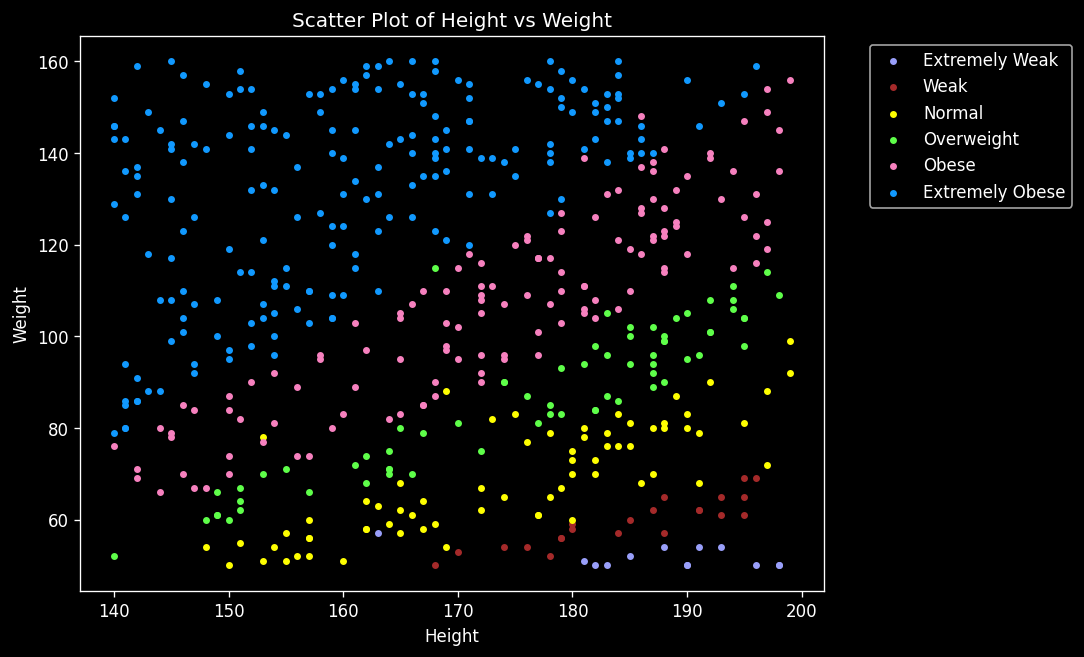

In [21]:
# Define distinctive colors for the six classes
classes = ['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obese', 'Extremely Obese']
colors = ['#999FFA', '#a52a2a', '#ffff00', '#5fff4a', '#f781bf', '#1199ff',]

# Initiate plot
plt.style.use('dark_background')            
plt.figure(figsize=(8, 6), dpi=120)

# Make a scatter plot for each class
for i, label in enumerate(classes):
        # TODO 6: extract data for the current class and scatter it
    class_data = dataset[dataset['Index'] == label]    
    plt.scatter(class_data['Height'], class_data['Weight'], color=colors[i], label=classes[i], s=10)

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Do you notice any problems in the this dataset? A problem in this content is defined as anything that would make classification harder for the model.

I think the problem is that data is skewed to wards higher BMI values . higher BMI values are more than lower BMI values

In [14]:
'''

'''

'\n\n'

## Model Building & Evaluation

In [6]:
# TODO 7: Rewrite the following code but using your own implementation. 
# Ideally, you should remove the Scikit learn code but you can keep it if you wish
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from BayesClassifier import BayesClassifier

#### Gaussian Naive Bayes

In [7]:
# Initiate
gnb_model = GaussianNB()
my_gnb_model = BayesClassifier("Naive")
# Fit
gnb_model.fit(x_train, y_train)
my_gnb_model.fit(x_train, y_train)
# Predict
gnb_y_pred = gnb_model.predict(x_val)
my_gnb_y_pred = my_gnb_model.predict(x_val)
# Evalute
gnb_accuracy = gnb_model.score(x_val, y_val)
my_gnb_accuracy = my_gnb_model.score(x_val, y_val)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("My Gaussian Naive Bayes Accuracy:", my_gnb_accuracy)

Gaussian Naive Bayes Accuracy: 0.77
My Gaussian Naive Bayes Accuracy: 0.77


#### Linear Discriminant Analysis

In [8]:
# Initiate
lda_model = LinearDiscriminantAnalysis(solver='eigen')
my_lda_model = BayesClassifier("LDA")
# Fit
lda_model.fit(x_train, y_train)
my_lda_model.fit(x_train, y_train)
# Predict
lda_y_pred = lda_model.predict(x_val)
my_lda_y_pred = my_lda_model.predict(x_val)
# Evaluate
lda_accuracy = lda_model.score(x_val, y_val)
my_lda_accuracy = my_lda_model.score(x_val, y_val)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)
print("My Linear Discriminant Analysis Accuracy:", my_lda_accuracy)


Linear Discriminant Analysis Accuracy: 0.84
My Linear Discriminant Analysis Accuracy: 0.84


#### Quadratic Discriminant Analysis

In [9]:
qda_model = QuadraticDiscriminantAnalysis()
my_qda_model = BayesClassifier("QDA")
qda_model.fit(x_train, y_train)
my_qda_model.fit(x_train, y_train)
qda_y_pred = qda_model.predict(x_val)
my_qda_y_pred = my_qda_model.predict(x_val)
qda_accuracy = qda_model.score(x_val, y_val)
my_qda_accuracy = my_qda_model.score(x_val, y_val)
print("Quadratic Discriminant Analysis Accuracy:", qda_accuracy)
print("My Quadratic Discriminant Analysis Accuracy:", my_qda_accuracy)

Quadratic Discriminant Analysis Accuracy: 0.93
My Quadratic Discriminant Analysis Accuracy: 0.93


#### Visualize Model

You won't be asked how the following code block works (exception) but comments explain it nonetheless

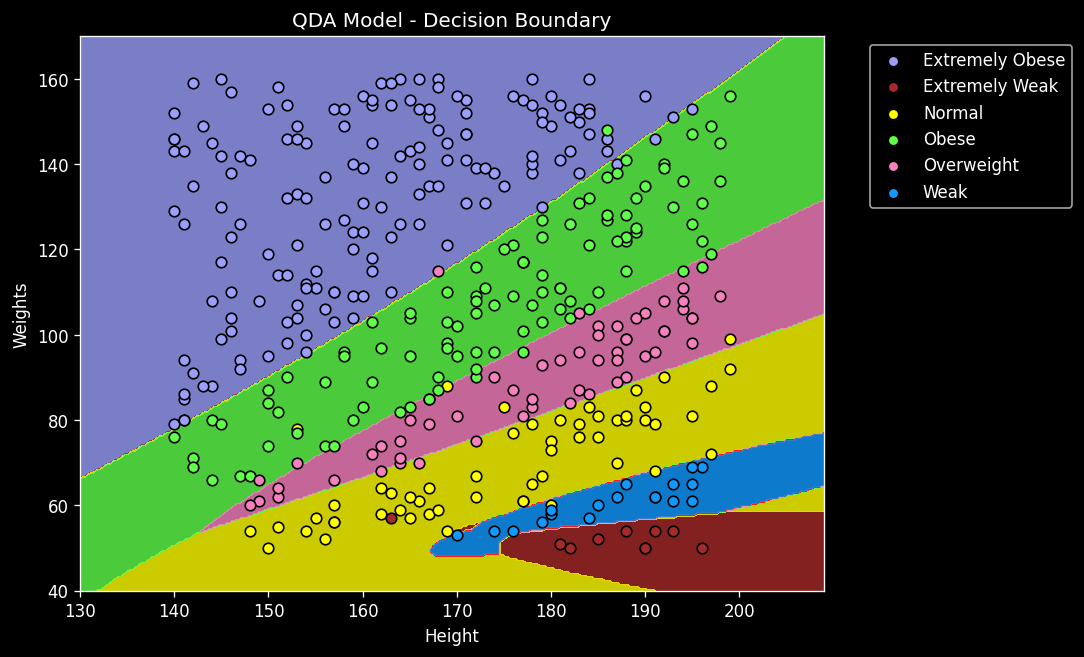

In [10]:
import matplotlib

# TODO 8: Put your trained QDA model here. Everything else is done for you.
qda_model = my_qda_model

# Sample data (assuming x_train is your training data)
h = np.linspace(np.min(x_train[:, 0])-10, np.max(x_train[:, 0])+10, 300)
w = np.linspace(np.min(x_train[:, 1])-10, np.max(x_train[:, 1])+10, 300)
x, y = np.meshgrid(h, w)

# For each pair (h, w) in the grid predict the labels by inputing (grid_size, 2) array of (h, w) into the model
z_labels = qda_model.predict(np.c_[x.ravel(), y.ravel()])               # flatten x, y then concatenate
# map array of labels to array of integers to represent different contour levels (colors)
z = np.array([list(qda_model.labels).index(label) for label in z_labels])
# reshape z into a grid
z = z.reshape(x.shape)

# Plot setupt
plt.style.use('dark_background')
plt.figure(figsize=(8, 6), dpi=120)
colors = np.array(['#999FFA', '#a52a2a', '#ffff00', '#5fff4a', '#f781bf',   '#ff0000', '#1199ff',])

# contour plot takes three grids and decides the color based on z (here it has integer labels)
# just as if we are looking at a 3D plot from above
plt.contourf(x, y, z, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.8)  # Use colormap for classes

# Scatter plot as done before
unique_classes = np.unique(y_train)  
for i, class_label in enumerate(unique_classes):
    class_data = x_train[y_train == class_label]  
    plt.scatter(class_data[:, 0], class_data[:, 1], label=class_label, edgecolor='black', s=40, c=colors[i if i!=5 else i+1]) # small bug here

plt.xlabel("Height")
plt.ylabel("Weights")
plt.title("QDA Model - Decision Boundary")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 1) Under the performance metrics above, map each of the images below to one of the models (write the name below it):

| ![Image 1](https://i.imgur.com/8Ki7Y08.png) | ![Image 2](https://i.imgur.com/6urbPib.png) | ![Image 3](https://i.imgur.com/aEigNFd.png) |
|:-----------------------:|:-----------------------:|:-----------------------:|
|       Model X      |       Model Y      |       Model Z      |
|       Naive        |       LDA          |         QDA         |

#### 2) It's known that height and weight of individuals follow a normal distribution. In light of that, explain why Model Z offered the best performance. Also, describe what violating assumptions did model X and model Y make that made them perform poorly.

In [ ]:
'''
model X Naive , Assumes features are  independent while they are not  ; 
model Y LDA , assumes features are normally ditrubuted then  -> equal covariance matrix --> then linearly sperarble 
, and by taking look at that the plot in the begining  
'''

<mark> <strong>model X  Naive </strong>, Assumes features are  independent while they are not   <br>  
<strong>model Y LDA </strong> , assumes features are normally ditrubuted then  -> equal covariance matrix --> then linearly sperarble 
, and by taking look at that the plot in the begining  
</mark>

#### 3) (Bonus) In what situations do you think Model X or Model Y could be better than model Z?

In [1]:
'''

I think QDA is a general case , as LDA and naive are just special cases from the QDA ,
so i  think it is never gonna be better it get ,by far  , equal restil 

'''

'\n\nI think QDA is a general case , as LDA and naive are just special cases from the QDA , so i  think it is never gonna be better it get ,by far  , equal restil \n  \n'

<div align="center">
<img src="https://media1.giphy.com/media/j6rZ55Ffe46hRGf4WX/giphy.gif" width=400>
</div>